In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics, model_selection, impute
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style



Exploritory Data Analysis on the INDICATOR Data
=====

In [3]:
RhoMis = pd.read_csv("data/RHoMIS_Indicators.csv", engine ="python")

RhoMis_full = pd.read_csv("data/RHoMIS_Full_Data.csv", engine ="python")
full = RhoMis_full

data = RhoMis
data.head()


,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,GPS_LAT,GPS_LON,GPS_ALT,Country,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_1_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.049505,3650.565755,0.000000,0,NaN,0.000000,1.000000,NaN
1,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_2_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.000000,3632.448997,0.000000,4,143.934000,0.499999,0.500001,75.0
2,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_3_1,NaN,NaN,NaN,Tanzania,...,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,3248.700905,1.000000,0.000000,20.0
3,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_4_1,NaN,NaN,NaN,Tanzania,...,0.000000,NaN,NaN,257.234727,257.234727,0,887.156057,NaN,NaN,15.0
4,CFM,TZ,2015,1,TZ_CFM_2015,TZ_2015_CFM_5_1,NaN,NaN,NaN,Tanzania,...,23.102694,0.931377,0.695041,925.310354,22.070240,0,14275.030776,1.000000,0.000000,50.0


In [4]:
data.describe()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
count,13310.000000,13310.0,9969.000000,9969.000000,9969.000000,13310.000000,13222.000000,9111.000000,12903.000000,13310.000000,...,1.331000e+04,10598.000000,10598.000000,1.302800e+04,1.322200e+04,13310.000000,5.620000e+03,11207.000000,11207.000000,5620.000000
mean,2016.947784,1.0,2.719685,14.344785,871.929988,8.325770,6.473068,4.762885,8.776539,6.888155,...,7.800049e+02,0.847832,0.449711,1.527396e+07,1.484723e+07,1.632532,2.740420e+04,0.778967,0.221033,488.167254
std,0.957380,0.0,9.645855,34.337597,754.450962,35.297364,32.695694,39.575757,196.496336,25.423234,...,6.890473e+04,0.310008,0.436514,9.478605e+08,9.408028e+08,2.773458,8.016996e+04,0.316099,0.316099,6370.202993
min,2015.000000,1.0,-14.620000,-89.690000,-99.080000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,-1.333333,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2016.000000,1.0,-5.010000,-1.450000,328.000000,4.000000,3.360000,1.000000,1.000000,0.210000,...,0.000000e+00,0.905693,0.000000,8.537846e+02,2.250044e+02,0.000000,1.472622e+03,0.558216,0.000000,50.000000
50%,2017.000000,1.0,0.760000,29.860000,613.400000,6.000000,5.000000,2.000000,2.000000,1.730000,...,0.000000e+00,1.000000,0.317386,2.856091e+03,9.221568e+02,0.000000,1.135251e+04,0.999885,0.000115,100.000000
75%,2018.000000,1.0,11.300000,36.430000,1238.300000,9.000000,7.290000,4.000000,4.000000,5.140000,...,0.000000e+00,1.000000,1.000000,8.242241e+03,2.571877e+03,2.000000,3.029822e+04,1.000000,0.441784,250.000000
max,2018.000000,1.0,25.800000,85.380000,4191.260000,3984.000000,3703.890000,3500.000000,14000.000000,540.400000,...,7.943184e+06,1.000000,1.000000,8.245939e+10,8.245937e+10,12.000000,2.717704e+06,1.000000,1.000000,460000.000000


In [5]:
#the data is mostly complete. 
#drop FIES_score, region
#Year should not be numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13310 entries, 0 to 13309
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID_PROJ                                       13310 non-null  object 
 1   ID_COUNTRY                                    13310 non-null  object 
 2   YEAR                                          13310 non-null  int64  
 3   ITERATION                                     13310 non-null  int64  
 4   SURVEY_ID                                     13310 non-null  object 
 5   ID_HH                                         13310 non-null  object 
 6   GPS_LAT                                       9969 non-null   float64
 7   GPS_LON                                       9969 non-null   float64
 8   GPS_ALT                                       9969 non-null   float64
 9   Country                                       13310 non-null 

In [6]:
100*(data.isnull().sum()/data.shape[0])

ID_PROJ                                           0.000000
ID_COUNTRY                                        0.000000
YEAR                                              0.000000
ITERATION                                         0.000000
SURVEY_ID                                         0.000000
ID_HH                                             0.000000
GPS_LAT                                          25.101427
GPS_LON                                          25.101427
GPS_ALT                                          25.101427
Country                                           0.000000
Region                                           85.537190
Altitude                                         18.069121
HHsizemembers                                     0.000000
HHsizeMAE                                         0.661157
HouseholdType                                     0.142750
Head_EducationLevel                               3.095417
LandOwned                                        31.5477

In [7]:


data = data.drop(columns=["Region","FIES_Score"]) 



In [8]:
#sns.displot("Food_Availability_kCal_MAE_day", data=data)

In [9]:


#pulls out numeric values
numerics  = data.select_dtypes(include=['int64', "float64"])
numerics.head()

#scaler = preprocessing.StandardScaler()

#data[numerics] = scaler.fit_transform(data[numerics])
#head(data)

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,2015,1,NaN,NaN,NaN,4,3.32,NaN,0.8,0.30,...,0.000000,1.000000,0.049505,3650.565755,0.000000,0,NaN,0.000000,1.000000,NaN
1,2015,1,NaN,NaN,NaN,10,5.85,NaN,0.8,0.00,...,0.000000,1.000000,0.000000,3632.448997,0.000000,4,143.934000,0.499999,0.500001,75.0
2,2015,1,NaN,NaN,NaN,5,4.32,NaN,0.8,0.73,...,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,3248.700905,1.000000,0.000000,20.0
3,2015,1,NaN,NaN,NaN,11,9.33,NaN,1.2,0.10,...,0.000000,NaN,NaN,257.234727,257.234727,0,887.156057,NaN,NaN,15.0
4,2015,1,NaN,NaN,NaN,6,5.41,NaN,0.8,2.75,...,23.102694,0.931377,0.695041,925.310354,22.070240,0,14275.030776,1.000000,0.000000,50.0


Correlation Analysis 
======

### Quantitative Variables

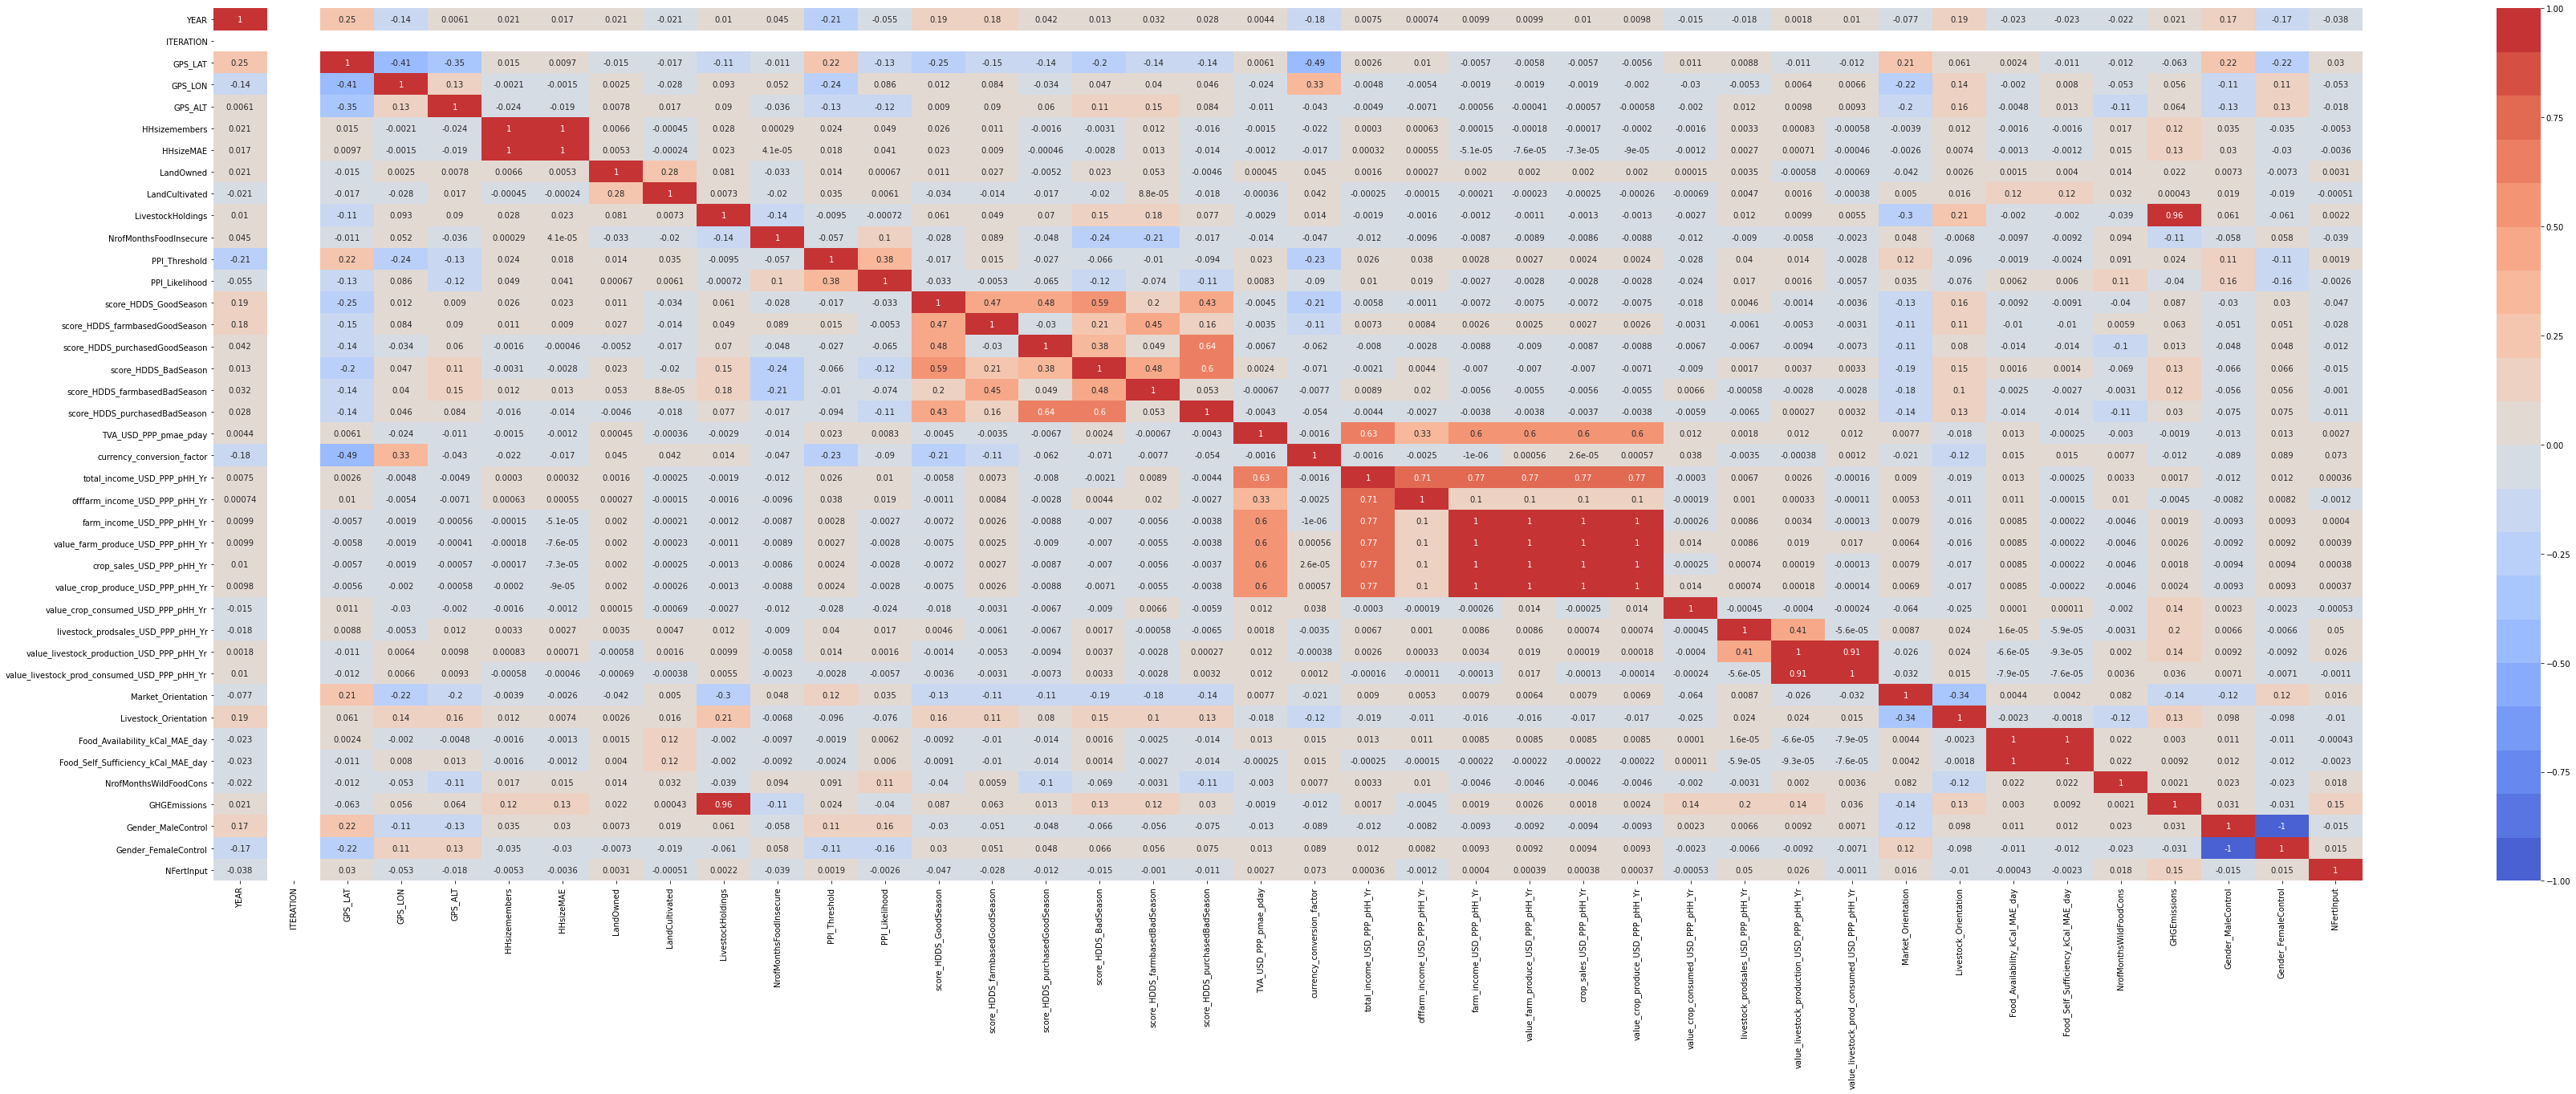

In [10]:
#Correlation Heat Map, ALL Variables only numerical variables here


corr = numerics.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(corr, cmap=sns.color_palette("coolwarm", 20), annot=True);

In [11]:
# Pairs plot with select varaibles
# pairsplot is SLOW, might have to reduce the amount of data

#sns.pairplot(data, vars=["Market_Orientation","PPI_Likelihood","Livestock_Orientation","HHsizemembers","value_farm_produce_USD_PPP_pHH_Yr"], kind="scatter")
#plt.show()

### Categorical Variables in Relationship to Responses

<Figure size 1440x720 with 0 Axes>

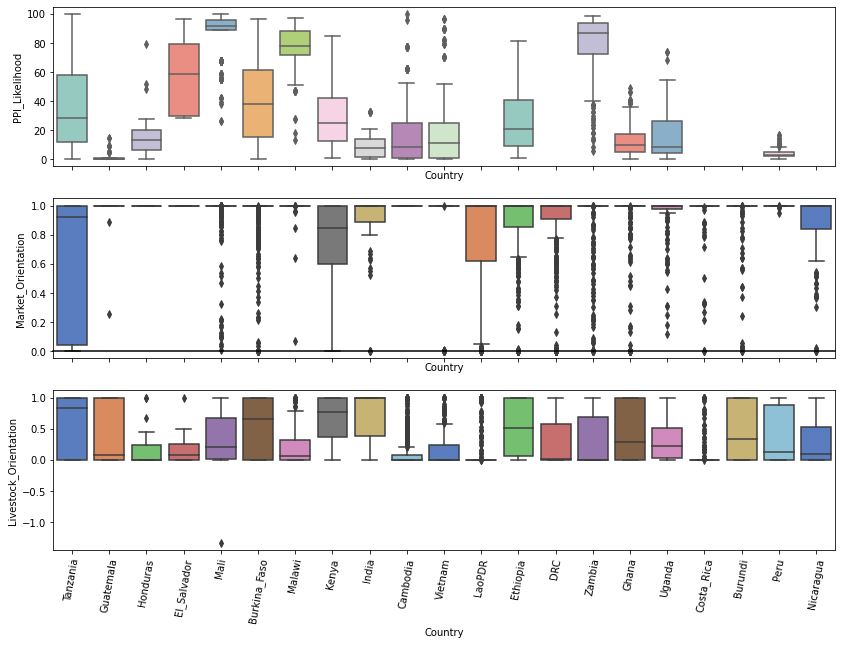

<Figure size 1440x720 with 0 Axes>

In [12]:

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), 
                             sharex=True)

#PPI_ Likelihood
sns.boxplot(x="Country",
                  y='PPI_Likelihood',
                  data = data,
                  palette="Set3", ax=ax1)


# Market Orientation
sns.boxplot(x="Country",
            y="Market_Orientation",
            data=data,
            palette="muted",
            ax=ax2)

ax2.axhline(0, color="k",
            clip_on=False)






sns.boxplot(x="Country",
            y="Livestock_Orientation",
            data=data,
            palette = "muted",
            ax=ax3)

ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=80)

plt.figure(figsize=(20, 10))


In [13]:

data["Country"].unique()

#DRC is Democratic Republic of Congo
#LaoPDR is Lao People's Democratic Republic

array(['Tanzania', 'Guatemala', 'Honduras', 'El_Salvador', 'Mali',
       'Burkina_Faso', 'Malawi', 'Kenya', 'India', 'Cambodia', 'Vietnam',
       'LaoPDR', 'Ethiopia', 'DRC', 'Zambia', 'Ghana', 'Uganda',
       'Costa_Rica', 'Burundi', 'Peru', 'Nicaragua'], dtype=object)

<Figure size 1120x800 with 0 Axes>

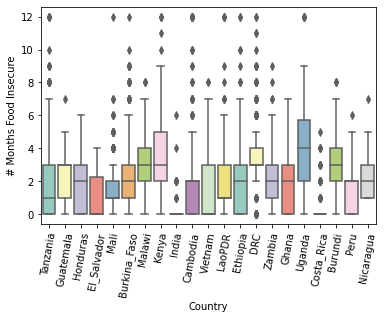

<Figure size 1120x800 with 0 Axes>

In [14]:

violin = sns.boxplot(x="Country", y='NrofMonthsFoodInsecure',data = data, palette="Set3")


violin.set_xticklabels(violin.get_xticklabels(), rotation=80)
violin.set(ylabel="# Months Food Insecure")

plt.figure(figsize=(14, 10), dpi=80)

[Text(0, 0, 'Tanzania'),
 Text(1, 0, 'Guatemala'),
 Text(2, 0, 'Honduras'),
 Text(3, 0, 'El_Salvador'),
 Text(4, 0, 'Mali'),
 Text(5, 0, 'Burkina_Faso'),
 Text(6, 0, 'Malawi'),
 Text(7, 0, 'Kenya'),
 Text(8, 0, 'India'),
 Text(9, 0, 'Cambodia'),
 Text(10, 0, 'Vietnam'),
 Text(11, 0, 'LaoPDR'),
 Text(12, 0, 'Ethiopia'),
 Text(13, 0, 'DRC'),
 Text(14, 0, 'Zambia'),
 Text(15, 0, 'Ghana'),
 Text(16, 0, 'Uganda'),
 Text(17, 0, 'Costa_Rica'),
 Text(18, 0, 'Burundi'),
 Text(19, 0, 'Peru'),
 Text(20, 0, 'Nicaragua')]

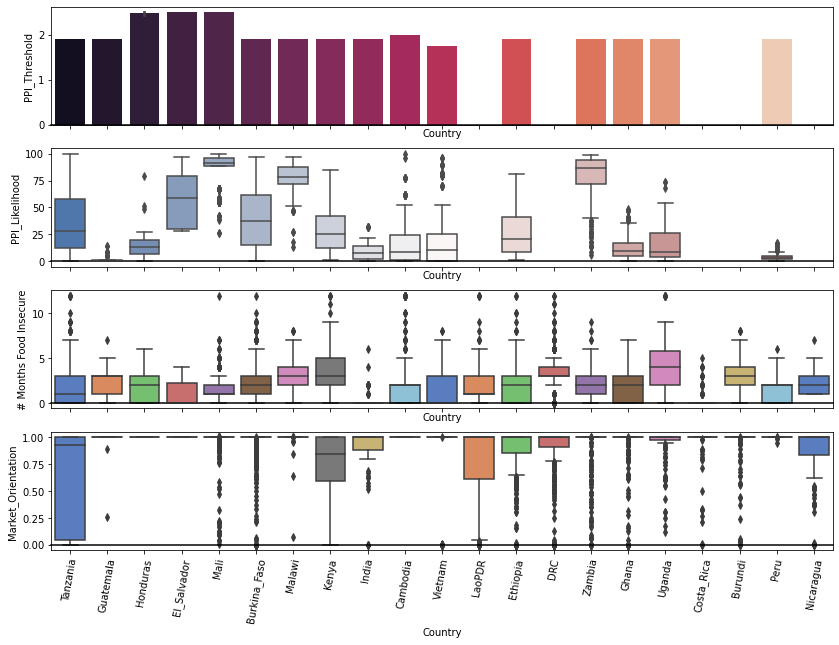

In [15]:
#generate plot grid
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

#PPI_Threashold
sns.barplot(x="Country", y="PPI_Threshold",data=data, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("PPI_Threshold")

#Likelihood
sns.boxplot(x="Country", y="PPI_Likelihood",data=data, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("PPI_Likelihood")

# Months Food Insecure
sns.boxplot(x="Country",
            y="NrofMonthsFoodInsecure",
            data=data, 
            palette="muted", 
            ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("# Months Food Insecure")



# Months Food Insecure
sns.boxplot(x="Country",
            y="Market_Orientation",
            data=data,
            palette="muted",
            ax=ax4)

ax4.axhline(0, color="k",
            clip_on=False)



#don't show outliers

#3rd plot 
ax4.set_xticklabels(violin.get_xticklabels(), rotation=80)


### Outliers
 - Significant outliers are present in the data. These values may not remain after NA processing
 - Country-level differences indicate country is correlated with each response. 
      * **This is a good lead into why we should consider group lasso regression -> we want the model to consider groupings such as country and education level etc** 

In [15]:
#test model 

def getNAs(df):

    colNames = []
    percentNA = []
    for i in df.columns:
        colNames.append(i)
        numNA = df[i].isna().sum()
        percent = (numNA/len(df))*100
        percentNA.append(percent)
        
    colNames = pd.DataFrame(colNames)
    colNames = colNames.rename(columns={0: "label"})
    percentNA = pd.DataFrame(percentNA)
    percentNA = percentNA.rename(columns={0: "numNA"})
    d = pd.concat([colNames,percentNA], axis = 1).sort_values(by=['numNA'], ascending = False)

        
    return d



def remove_columns(df, threshold):
    '''drop columns by a threshold (percentage of na)'''
    data = getNAs(df)
    column_names = data[data.numNA >= threshold].label
    clean_data = df.drop(column_names, axis = 1)
    
    return clean_data

In [16]:
# Dataset without NA's still not clean but good to see which categorical values will not be used
c_data = remove_columns(data, 25)
c_data

c_data=c_data.dropna()

In [17]:
data[["Country", "Market_Orientation", "PPI_Likelihood"]].groupby("Country").mean()

,Market_Orientation,PPI_Likelihood
Country,,
Burkina_Faso,0.977316,39.884653
Burundi,0.931116,NaN
Cambodia,1.000000,15.186888
Costa_Rica,0.940751,NaN
DRC,0.854968,NaN
El_Salvador,1.000000,58.800000
Ethiopia,0.854699,27.448456
Ghana,0.901693,12.241205
Guatemala,0.989575,1.001227


In [18]:
# Averages by Country Alone
data[["Country", "Market_Orientation", "PPI_Likelihood", "Head_EducationLevel"]].groupby("Country").mean()


,Market_Orientation,PPI_Likelihood
Country,,
Burkina_Faso,0.977316,39.884653
Burundi,0.931116,NaN
Cambodia,1.000000,15.186888
Costa_Rica,0.940751,NaN
DRC,0.854968,NaN
El_Salvador,1.000000,58.800000
Ethiopia,0.854699,27.448456
Ghana,0.901693,12.241205
Guatemala,0.989575,1.001227


In [19]:
# By education level alone,
#data needs to be cleaned
data[["Country", "Market_Orientation", "PPI_Likelihood", "Head_EducationLevel"]].groupby("Head_EducationLevel").mean()


,Market_Orientation,PPI_Likelihood
Head_EducationLevel,,
1 5alphabetisé,1.000000,9.100000
1(école rurale),1.000000,71.800000
"1, alphabétisé(mooré)",1.000000,48.233333
12 alphabétisé (mooré),1.000000,76.400000
15alplabetisation,1.000000,6.600000
"4, 5 alphabétisation en mooré",1.000000,22.800000
5 alphabétisation,1.000000,61.200000
5 alphabétisation en mooré,1.000000,34.380000
5 franco-arabe,1.000000,22.800000


In [20]:
#data[["Country", "Market_Orientation", "PPI_Likelihood", "Head_EducationLevel"]].groupby("Head_EducationLevel","Country").mean()

c_data.groupby(["Country", "Head_EducationLevel"])["Market_Orientation", "PPI_Likelihood"]. mean()

Market_Orientation  \
Country      Head_EducationLevel                                                     
Burkina_Faso 1 5alphabetisé                                               1.000000   
             1(école rurale)                                              1.000000   
             1, alphabétisé(mooré)                                        1.000000   
             12 alphabétisé (mooré)                                       1.000000   
             4, 5 alphabétisation en mooré                                1.000000   
             5 alphabétisation en mooré                                   1.000000   
             5 franco-arabe                                               1.000000   
             5(franco-arabe)                                              1.000000   
             5alphabetisation                                             1.000000   
             No_school                                                    0.971293   
             adult education, literacy school or parish school            1.000000   
             adult_education                                              0.993770   
             alphabétisée (mooré)                                         1.000000   
             no school                                                    1.000000   
             no_school                                                    0.968550   
             post-secondary                                               1.000000   
             postsecondary                                                1.000000   
             primary                                                      0.984008   
             religious_school                                             0.933213   
             secondary                                                    0.972714   
Ethiopia     No_school                                                    0.708507   
             adult_education                                              0.849762   
             no_school                                                    0.763569   
             postsecondary                                                1.000000   
             primary                                                      0.811862   
             secondary                                                    0.831337   
Ghana        No_school                                                    0.851863   
             postsecondary                                                0.951117   
             primary                                                      0.923254   
             secondary                                                    0.888633   
...                                                                            ...   
Mali         adult_education                                              0.967760   
             no school                                                    1.000000   
             no_school                                                    0.967534   
             postsecondary                                                0.587012   
             primary                                                      0.928852   
             religious_school                                             0.969631   
             secondary                                                    0.931198   
Peru         adult_education                                              1.000000   
             no_school                                                    1.000000   
             postsecondary                                                1.000000   
             primary                                                      0.999711   
             secondary                                                    0.998144   
Tanzania     adult_education                                              0.833496   
             illiterate                                                   0.218162   
             islamic_s

In [21]:
c_data.groupby(["Country", "HouseholdType"])["Market_Orientation",'Livestock_Orientation', "PPI_Likelihood"]. count()

#MOST household types are couples. The high variability of man_single and woman_single appears to be from a smalll set of data in many cases


Market_Orientation  Livestock_Orientation  \
Country      HouseholdType                                              
Burkina_Faso couple                       1697                   1697   
             man_single                     12                     12   
             woman_single                   79                     79   
Ethiopia     couple                        404                    404   
             man_single                     18                     18   
             woman_single                   33                     33   
Ghana        couple                        169                    169   
             man_single                      5                      5   
             woman_single                   34                     34   
Guatemala    couple                         38                     38   
             man_single                      1                      1   
             woman_single                    8                      8   
Honduras     couple                         14                     14   
             man_single                      1                      1   
India        couple                          7                      7   
             man_single                      1                      1   
             woman_single                    1                      1   
Kenya        couple                        526                    526   
             man_single                     17                     17   
             woman_single                  124                    124   
Mali         0                               2                      2   
             couple                        491                    491   
             man_single                     14                     14   
             woman_single                    6                      6   
Peru         couple                         90                     90   
             man_single                      5                      5   
             woman_single                   15                     15   
Tanzania     couple                       1153                   1153   
             man_single                     32                     32   
             woman_single                  129                    129   
Uganda       couple                         62                     62   
             man_single                      4                      4   
             woman_single                   20                     20   
Zambia       couple                        225                    225   
             man_single                      3                      3   
             woman_single                   47                     47   

                            PPI_Likelihood  
Country      HouseholdType                  
Burkina_Faso couple                   1697  
             man_single                 12  
             woman_single               79  
Ethiopia     couple                    404  
             man_single                 18  
             woman_single               33  
Ghana        couple                    169  
             man_single                  5  
             woman_single               34  
Guatemala    couple                     38  
             man_single                  1  
             woman_single                8  
Honduras     couple                     14  
             man_single                  1  
India        couple                      7  
             man_single                  1  
             woman_single                1  
Kenya        couple                    526  
             man_single                 17  
             woman_single              124  
Mali         0                           2  
             couple                    491  
             man_single                 14  
             woman_single                6  
Peru         couple                     90  
             man_single               

In [22]:
c_data.groupby(["Country", "HouseholdType"])["Market_Orientation",'Livestock_Orientation', "PPI_Likelihood"]. mean()

Market_Orientation  Livestock_Orientation  \
Country      HouseholdType                                              
Burkina_Faso couple                   0.977224               0.540927   
             man_single               1.000000               0.685888   
             woman_single             0.992799               0.494439   
Ethiopia     couple                   0.804583               0.497088   
             man_single               0.834019               0.558299   
             woman_single             0.760677               0.572598   
Ghana        couple                   0.853043               0.517409   
             man_single               0.858963               0.473249   
             woman_single             0.952520               0.660716   
Guatemala    couple                   0.980453               0.535667   
             man_single               1.000000               0.000000   
             woman_single             0.985990               0.298613   
Honduras     couple                   1.000000               0.069325   
             man_single               1.000000               1.000000   
India        couple                   0.977335               0.571429   
             man_single               0.864197               1.000000   
             woman_single             1.000000               0.000000   
Kenya        couple                   0.762211               0.639933   
             man_single               0.717194               0.678245   
             woman_single             0.789118               0.587730   
Mali         0                        1.000000               0.330260   
             couple                   0.968094               0.356698   
             man_single               0.976067               0.374227   
             woman_single             0.991784               0.168374   
Peru         couple                   0.999241               0.376077   
             man_single               1.000000               0.305342   
             woman_single             1.000000               0.369169   
Tanzania     couple                   0.534896               0.731882   
             man_single               0.540841               0.672949   
             woman_single             0.658909               0.620469   
Uganda       couple                   0.925465               0.277563   
             man_single               1.000000               0.104090   
             woman_single             0.916037               0.345861   
Zambia       couple                   0.886103               0.306130   
             man_single               0.648019               0.510785   
             woman_single             0.942840               0.337542   

                            PPI_Likelihood  
Country      HouseholdType                  
Burkina_Faso couple              37.181909  
             man_single          39.491667  
             woman_single        44.174684  
Ethiopia     couple              34.069554  
             man_single          16.411111  
             woman_single        26.451515  
Ghana        couple              13.772781  
             man_single          13.280000  
             woman_single         9.641176  
Guatemala    couple               1.078947  
             man_single           0.000000  
             woman_single         0.012500  
Honduras     couple              25.800000  
             man_single          19.900000  
India        couple               2.014286  
             man_single           0.600000  
             woman_single         7.900000  
Kenya        couple              26.088023  
             man_single          18.105882  
             woman_single        28.304032  
Mali         0                   82.650000  
             couple              88.957026  
             man_single          91.507143  
             woman_single        90.533333  
Peru         couple               4.055556  
             man_single           2.02

Preping Data for Linear Modeling
=========== 


In [23]:

# obtain raw data
X = drop_data.loc[:, drop_data.columns != 'PPI_Likelihood']
y = drop_data.loc[:, "PPI_Likelihood"]

X = pd.get_dummies(data=X, drop_first=True) # TODO: Use OneHop

# Train Test Split the raw
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .3)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)






#get numerics
te_numerics = X_test.columns[X_test.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
tr_numerics = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]



scaler = preprocessing.StandardScaler()

#scale numerics only
#X_test[te_numerics] = scaler.fit_transform(X_test[te_numerics])
#X_train[tr_numerics] = scaler.fit_transform(X_train[tr_numerics])

X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)



# Impute NaN's
imputer = impute.SimpleImputer(missing_values= np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# Add ones column for X_tr and X_te
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))


#List for optimally tuned model Train and Test MSE's
op_mods = []


NameError: name 'drop_data' is not defined

Lasso
===

Group Lasso Regularisation
====

**Description** 

Group Lasso 


$\ell (\beta_g, ) = \|\sum_{g \in G}[\textbf{X}_g \beta_g] - \textbf {y}\|^2_2 + \lambda_1\|\beta\|_1 + \lambda_2 \sum_{g \in G}\sqrt{d_g}\|\beta\|_2$

- $\textbf{X}_g \in \mathbb{R}^{n x d_g}$ is the data matrix corresponding to the covariates in group $g$,

- $\beta_g$ is the regression coefficent representing group $g$,
- $\textbf{y} \in \textbf{R}^n$ is the regression targert. 
- $d_g$ is the dimensionality of group $g$ 
- $\lambda_1$ is the parameter-wise regularisation penalty 
- $\lambda_2$ is the group-wise regularisation penalty  
- $G$ is the set of all groups.